<h1 style="color:lime;font-style:italic; font-family:Georgia">1. Importing the Required Libraries:</h1>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import os

<h1 style="color:lime;font-style:italic; font-family:Georgia">2. Reading the Datasets:</h1>

<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color:orange;">
WAY I : Individually One by One
</h6>

In [2]:
os.getcwd()  #This is the current directory

'g:\\DataScienceXpert_End_to_End_Solution_for_Key_Domains\\B2B_Shipping_Cost_Accuracy\\exp_notebook'

In [3]:
courier=pd.read_csv(r'G:\DataScienceXpert_End_to_End_Solution_for_Key_Domains\B2B_Shipping_Cost_Accuracy\b2b_data\Courier Company - Rates.csv')
invoice = pd.read_csv(r'G:\DataScienceXpert_End_to_End_Solution_for_Key_Domains\B2B_Shipping_Cost_Accuracy\b2b_data\Invoice.csv')
order = pd.read_csv(r'G:\DataScienceXpert_End_to_End_Solution_for_Key_Domains\B2B_Shipping_Cost_Accuracy\b2b_data\Order Report.csv')
pincode = pd.read_csv(r'G:\DataScienceXpert_End_to_End_Solution_for_Key_Domains\B2B_Shipping_Cost_Accuracy\b2b_data\pincodes.csv')
sku = pd.read_csv(r'G:\DataScienceXpert_End_to_End_Solution_for_Key_Domains\B2B_Shipping_Cost_Accuracy\b2b_data\SKU Master.csv')

In [4]:
courier.head()

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [5]:
invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [6]:
order.head()

,ExternOrderNo,SKU,Order Qty,Unnamed: 3,Unnamed: 4
0,2001827036,8904223818706,1.0,NaN,NaN
1,2001827036,8904223819093,1.0,NaN,NaN
2,2001827036,8904223819109,1.0,NaN,NaN
3,2001827036,8904223818430,1.0,NaN,NaN
4,2001827036,8904223819277,1.0,NaN,NaN


In [7]:
pincode.head()

,Warehouse Pincode,Customer Pincode,Zone,Unnamed: 3,Unnamed: 4
0,121003,507101,d,NaN,NaN
1,121003,486886,d,NaN,NaN
2,121003,532484,d,NaN,NaN
3,121003,143001,b,NaN,NaN
4,121003,515591,d,NaN,NaN


In [8]:
sku.head()

,SKU,Weight (g),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,8904223815682,210,NaN,NaN,NaN
1,8904223815859,165,NaN,NaN,NaN
2,8904223815866,113,NaN,NaN,NaN
3,8904223815873,65,NaN,NaN,NaN
4,8904223816214,120,NaN,NaN,NaN


<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color:orange;">
WAY II: Reading Multiple Different Files at Once 
</h6>

In [9]:
# Step 1: Define the folder path where the CSV files are stored
# This is the path to the directory where all our CSV files are located.
folder_path = 'G:\\DataScienceXpert_End_to_End_Solution_for_Key_Domains\\B2B_Shipping_Cost_Accuracy\\b2b_data'

# Print all files initially present in the folder (useful for checking what files are there)
print("Initially, the folder contains:", os.listdir(folder_path))
print('-'*130)

# Step 2: List all CSV files in the folder
# We filter out only the files that end with '.csv' to focus on reading CSV files.
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
print("List of all csv files got collected and those are :",csv_files)
print('-'*130)

# Step 3: Loop through the CSV files and store them in individual DataFrames
# A dictionary 'dataframes' will store each CSV file's data, with the filename (without '.csv') as the key.
dataframes = {}

# Step 4: Process each CSV file
# This loop reads each file, assigns a name based on the filename, and stores the data in 'dataframes' dictionary.
for file in csv_files:
    file_path = os.path.join(folder_path, file)  # Full file path to read the CSV
    
    try:
        # Extract the filename without the '.csv' extension to use as the DataFrame's name
        df_name = file.split('.')[0]  # It extract only 0th indexed part before '.' ie. name of the file without csv
        
        # Print the DataFrame name to ensure it's working correctly
        print(df_name)  # This will print the name of each DataFrame
        
        # Read the CSV file and store it in the 'dataframes' dictionary
        dataframes[df_name] = pd.read_csv(file_path)
    
    except Exception as e:
        # If there is any error during file reading, print the error and continue
        print(f"Error reading {file}: {e}")

# Now each CSV file is stored as a DataFrame in the 'dataframes' dictionary


Initially, the folder contains: ['Courier Company - Rates.csv', 'Invoice.csv', 'Order Report.csv', 'pincodes.csv', 'SKU Master.csv']
----------------------------------------------------------------------------------------------------------------------------------
List of all csv files got collected and those are : ['Courier Company - Rates.csv', 'Invoice.csv', 'Order Report.csv', 'pincodes.csv', 'SKU Master.csv']
----------------------------------------------------------------------------------------------------------------------------------
Courier Company - Rates
Invoice
Order Report
pincodes
SKU Master


In [10]:
dataframes   #This is the dataframe having key as name of the file without .csv extention and values as the table elements.

{'Courier Company - Rates':    fwd_a_fixed  fwd_a_additional  fwd_b_fixed  fwd_b_additional  fwd_c_fixed  \
 0         29.5              23.6           33              28.3         40.1   
 
    fwd_c_additional  fwd_d_fixed  fwd_d_additional  fwd_e_fixed  \
 0              38.9         45.4              44.8         56.6   
 
    fwd_e_additional  rto_a_fixed  rto_a_additional  rto_b_fixed  \
 0              55.5         13.6              23.6         20.5   
 
    rto_b_additional  rto_c_fixed  rto_c_additional  rto_d_fixed  \
 0              28.3         31.9              38.9         41.3   
 
    rto_d_additional  rto_e_fixed  rto_e_additional  
 0              44.8         50.7              55.5  ,
 'Invoice':           AWB Code    Order ID  Charged Weight  Warehouse Pincode  \
 0    1091117222124  2001806232            1.30             121003   
 1    1091117222194  2001806273            1.00             121003   
 2    1091117222931  2001806408            2.50             12100

In [11]:
dataframes['Courier Company - Rates'].head()

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [12]:
dataframes['Invoice'].head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [13]:
dataframes['Order Report'].head()

,ExternOrderNo,SKU,Order Qty,Unnamed: 3,Unnamed: 4
0,2001827036,8904223818706,1.0,NaN,NaN
1,2001827036,8904223819093,1.0,NaN,NaN
2,2001827036,8904223819109,1.0,NaN,NaN
3,2001827036,8904223818430,1.0,NaN,NaN
4,2001827036,8904223819277,1.0,NaN,NaN


In [14]:
dataframes['pincodes'].head()

,Warehouse Pincode,Customer Pincode,Zone,Unnamed: 3,Unnamed: 4
0,121003,507101,d,NaN,NaN
1,121003,486886,d,NaN,NaN
2,121003,532484,d,NaN,NaN
3,121003,143001,b,NaN,NaN
4,121003,515591,d,NaN,NaN


In [15]:
dataframes['SKU Master'].head()

,SKU,Weight (g),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,8904223815682,210,NaN,NaN,NaN
1,8904223815859,165,NaN,NaN,NaN
2,8904223815866,113,NaN,NaN,NaN
3,8904223815873,65,NaN,NaN,NaN
4,8904223816214,120,NaN,NaN,NaN


<hr style="border-top: 3px solid yellow;">

<h1 style="color:lime;font-style:italic; font-family:Georgia">3. Basic Data Inspection:</h1>

<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color: aqua;">
Checking Number of Records and Features</h6>

In [16]:
# Lets take the dataframes created individually...
print(f"Number of records in courier table {courier.shape[0]}")
print(f"Number of features in courier table {courier.shape[1]}")
print('-'*130)

print(f"Number of records in invoice table {invoice.shape[0]}")
print(f"Number of features in invoice table {invoice.shape[1]}")
print('-'*130)

print(f"Number of records in order table {order.shape[0]}")
print(f"Number of features in order table {order.shape[1]}")
print('-'*130)

print(f"Number of records in pincode table {pincode.shape[0]}")
print(f"Number of features in pincode table {pincode.shape[1]}")
print('-'*130)

print(f"Number of records in sku(stock keeping unit) table {sku.shape[0]}")
print(f"Number of features in sku(stock keeping unit) table {sku.shape[1]}")

Number of records in courier table 1
Number of features in courier table 20
----------------------------------------------------------------------------------------------------------------------------------
Number of records in invoice table 124
Number of features in invoice table 8
----------------------------------------------------------------------------------------------------------------------------------
Number of records in order table 400
Number of features in order table 5
----------------------------------------------------------------------------------------------------------------------------------
Number of records in pincode table 124
Number of features in pincode table 5
----------------------------------------------------------------------------------------------------------------------------------
Number of records in sku(stock keeping unit) table 66
Number of features in sku(stock keeping unit) table 5


<hr style="border-top: 3px solid blue;">

<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color: #7DF9FF;">
Checking Columns/Features Present</h6>

In [17]:
print('Features/Columns in Courier Table are:\n',courier.columns)
print('-'*130)

print('Features/Columns in Invoice Table are:\n',invoice.columns)
print('-'*130)

print('Features/Columns in Order Table are:\n',order.columns)
print('-'*130)

print('Features/Columns in Pincode Table are:\n',pincode.columns)
print('-'*130)

print('Features/Columns in SKU Table are:\n',sku.columns)


Features/Columns in Courier Table are:
 Index(['fwd_a_fixed', 'fwd_a_additional', 'fwd_b_fixed', 'fwd_b_additional',
       'fwd_c_fixed', 'fwd_c_additional', 'fwd_d_fixed', 'fwd_d_additional',
       'fwd_e_fixed', 'fwd_e_additional', 'rto_a_fixed', 'rto_a_additional',
       'rto_b_fixed', 'rto_b_additional', 'rto_c_fixed', 'rto_c_additional',
       'rto_d_fixed', 'rto_d_additional', 'rto_e_fixed', 'rto_e_additional'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------------------
Features/Columns in Invoice Table are:
 Index(['AWB Code', 'Order ID', 'Charged Weight', 'Warehouse Pincode',
       'Customer Pincode', 'Zone', 'Type of Shipment', 'Billing Amount (Rs.)'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------------------
Features/Columns in Order Table are:
 Index(['ExternOrderNo', 'SKU', 'Order Qt

<h7 style="color:gold;font-style:italic; font-family:Georgia">Observation:</h7>

- **`Courier Table`**: Contains forward (`fwd_`) and return (`rto_`) fixed and additional charges categorized by tiers (A to E). Likely represents shipping costs based on different zones or package types.
  
- **`Invoice Table`**: Includes key billing details such as tracking (AWB Code), order identification, shipping weight, pincode information, shipment type, and total billing amount. Useful for cost analysis and shipment tracking.

- **`Order Table`**: Focuses on order details like external order numbers, SKUs, and quantities. The presence of unnamed columns suggests missing or irrelevant data that may need cleaning.

- **`Pincode Table`**: Maps warehouse and customer pincodes to their respective zones, potentially aiding in zone-based cost calculations. Unnamed columns again suggest missing or irrelevant data.

- **`SKU Table`**: Lists SKU (product codes) and their respective weights, which are crucial for calculating shipping costs. Unnamed columns here also indicate potential need for data cleanup.

<hr style="border-top: 3px solid blue;">

<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color: aqua">
Random Sample of the dataset.</h6>

In [18]:
print("Random Sample from Courier Table:\n")
courier.sample()   # Since Number of Record is only one.

Random Sample from Courier Table:



,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [19]:
print("Random Samples from Invoice Table:\n")
invoice.sample(5)

Random Samples from Invoice Table:



,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
57,1091117795531,2001809794,1.50,121003,580007,d,Forward charges,135.0
79,1091121031745,2001821679,0.20,121003,307026,d,Forward charges,45.4
86,1091121306101,2001820690,0.15,121003,313003,d,Forward charges,45.4
94,1091117229183,2001806968,0.68,121003,305801,d,Forward charges,90.2
6,1091117229776,2001806885,1.00,121003,208019,b,Forward charges,61.3


In [20]:
print('Random Sample from Order Table:\n')
order.sample(5)

Random Sample from Order Table:



,ExternOrderNo,SKU,Order Qty,Unnamed: 3,Unnamed: 4
111,2001811306,8904223819352,1.0,NaN,NaN
61,2001816996,8904223818942,1.0,NaN,NaN
175,2001809794,8904223816214,1.0,NaN,NaN
280,2001807362,8904223819291,2.0,NaN,NaN
340,2001806652,8904223818706,1.0,NaN,NaN


In [21]:
print('Random Sample from Pincode Table:\n')
pincode.sample(5)

Random Sample from Pincode Table:



,Warehouse Pincode,Customer Pincode,Zone,Unnamed: 3,Unnamed: 4
100,121003,335803,b,NaN,NaN
91,121003,322201,b,NaN,NaN
0,121003,507101,d,NaN,NaN
64,121003,334004,b,NaN,NaN
4,121003,515591,d,NaN,NaN


In [22]:
print('Random Sample from SKU Table:\n')
sku.sample(5)

Random Sample from SKU Table:



,SKU,Weight (g),Unnamed: 2,Unnamed: 3,Unnamed: 4
31,8904223818980,110,NaN,NaN,NaN
60,8904223819338,600,NaN,NaN,NaN
43,8904223819345,165,NaN,NaN,NaN
27,8904223818997,490,NaN,NaN,NaN
35,8904223819116,30,NaN,NaN,NaN


In [23]:
# I have noticed that in order , pincode and sku table Unnamed Columns are there having NaN values only...Lets explore it futher using info().

<hr style="border-top: 3px solid blue;">

<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color:aqua">
Examine Datatypes and Information about features</h6>

In [24]:
print("Information about the Courier Table is:")
courier.info()

Information about the Courier Table is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fwd_a_fixed       1 non-null      float64
 1   fwd_a_additional  1 non-null      float64
 2   fwd_b_fixed       1 non-null      int64  
 3   fwd_b_additional  1 non-null      float64
 4   fwd_c_fixed       1 non-null      float64
 5   fwd_c_additional  1 non-null      float64
 6   fwd_d_fixed       1 non-null      float64
 7   fwd_d_additional  1 non-null      float64
 8   fwd_e_fixed       1 non-null      float64
 9   fwd_e_additional  1 non-null      float64
 10  rto_a_fixed       1 non-null      float64
 11  rto_a_additional  1 non-null      float64
 12  rto_b_fixed       1 non-null      float64
 13  rto_b_additional  1 non-null      float64
 14  rto_c_fixed       1 non-null      float64
 15  rto_c_additional  1 non-null      float64
 16  rto_d_fi

<h7 style="color:gold;font-style:italic; font-family:Georgia">Observation:</h7>

- The table has a single row of data.
- All 20 columns are non-null.
- 19 columns are of type `float64`, representing precise cost data.
- Only one column, `fwd_b_fixed`, is of type `int64`.
- The data represents fixed and additional costs for forward (fwd) and return-to-origin (rto) services across categories A to E.


-------------------

In [25]:
print("Information about the Invoice Table is:")
invoice.info()

Information about the Invoice Table is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AWB Code              124 non-null    int64  
 1   Order ID              124 non-null    int64  
 2   Charged Weight        124 non-null    float64
 3   Warehouse Pincode     124 non-null    int64  
 4   Customer Pincode      124 non-null    int64  
 5   Zone                  124 non-null    object 
 6   Type of Shipment      124 non-null    object 
 7   Billing Amount (Rs.)  124 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.9+ KB


<h7 style="color:gold;font-style:italic; font-family:Georgia">Observation:</h7>

- The table contains 124 entries with 8 columns.
- All columns have non-null values, meaning there are no missing data points.
- There are 4 columns with integer data types (`AWB Code`, `Order ID`, `Warehouse Pincode`, `Customer Pincode`).
- Two columns are of type `float64` (`Charged Weight` and `Billing Amount (Rs.)`), representing numeric values.
- The `Zone` and `Type of Shipment` columns are categorical data stored as objects.
- The table likely tracks shipping invoices, including details like AWB codes, shipment zones, and billing amounts.

---------------

In [26]:
print("Information about the Order Table is:")
order.info()

Information about the Order Table is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExternOrderNo  400 non-null    int64  
 1   SKU            400 non-null    object 
 2   Order Qty      400 non-null    float64
 3   Unnamed: 3     0 non-null      float64
 4   Unnamed: 4     0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 15.8+ KB


<h7 style="color:gold;font-style:italic; font-family:Georgia">Observation:</h7>

- The table contains 400 entries.
- Columns `ExternOrderNo`, `SKU`, and `Order Qty` have complete data with no missing values.
- Two columns, `Unnamed: 3` and `Unnamed: 4`, contain entirely null values.
- `ExternOrderNo` is an integer, `SKU` is categorical, and `Order Qty` is a float.
- The unnecessary `Unnamed` columns should be removed for better data quality.

In [27]:
# Lets Remove the Unnamed: 3 and Unnamed: 4 Columns.

order.drop(columns=['Unnamed: 3','Unnamed: 4'],inplace=True)  # inplace =True makesures that , columns will get dropped from the original table mentioned.

In [28]:
order.info()  # No Unnecessary Unnamed columns are there.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExternOrderNo  400 non-null    int64  
 1   SKU            400 non-null    object 
 2   Order Qty      400 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


-------------

In [29]:
print('Information about the Pincode Table:\n')
pincode.info()

Information about the Pincode Table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Warehouse Pincode  124 non-null    int64  
 1   Customer Pincode   124 non-null    int64  
 2   Zone               124 non-null    object 
 3   Unnamed: 3         0 non-null      float64
 4   Unnamed: 4         0 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.0+ KB


<h7 style="color:gold;font-style:italic; font-family:Georgia">Observation:</h7>

- The table contains 124 entries with complete data for `Warehouse Pincode`, `Customer Pincode`, and `Zone`.
- Both `Warehouse Pincode` and `Customer Pincode` columns have integer data types.
- The `Zone` column is categorical and contains non-null values.
- Two columns, `Unnamed: 3` and `Unnamed: 4`, are entirely null and do not provide any useful information.
- The unnecessary `Unnamed` columns should be removed to enhance data clarity.

In [30]:
# Lets Remove the Unnamed: 3 and Unnamed: 4 Columns.

pincode.drop(columns=['Unnamed: 3','Unnamed: 4'],inplace=True) 

In [31]:
pincode.info()   # No Unnecessary Unnamed columns are there.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Warehouse Pincode  124 non-null    int64 
 1   Customer Pincode   124 non-null    int64 
 2   Zone               124 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


------------------

In [32]:
print("Information about the SKU Table:\n")
sku.info()


Information about the SKU Table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SKU         66 non-null     object 
 1   Weight (g)  66 non-null     int64  
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.7+ KB


<h7 style="color:gold;font-style:italic; font-family:Georgia">Observation:</h7>

- The `SKU Table` contains 66 entries with complete data for the `SKU` and `Weight (g)` columns.
- The `SKU` column is categorical, and `Weight (g)` is an integer representing product weight.
- Three columns (`Unnamed: 2`, `Unnamed: 3`, `Unnamed: 4`) are entirely null and do not add value.
- The unnecessary `Unnamed` columns should be removed to improve data quality.

In [33]:
# Lets Remove the Unnamed: 2,Unnamed: 3 and Unnamed: 4 Columns.

sku.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) 

In [34]:
print("Information about the SKU Table:\n")
sku.info()

Information about the SKU Table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SKU         66 non-null     object
 1   Weight (g)  66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


---------------------------------------

<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color:aqua">
Checking for Null Values if Present</h6>

In [35]:
# Checking for Null Values in Courier Table if any..
print("Total Number of Null Values present in courier table:",courier.isnull().sum().sum())
print("\nChecking for Null Values in each column of courier table:")
courier.isnull().sum()

Total Number of Null Values present in courier table: 0

Checking for Null Values in each column of courier table:


fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed         0
rto_a_additional    0
rto_b_fixed         0
rto_b_additional    0
rto_c_fixed         0
rto_c_additional    0
rto_d_fixed         0
rto_d_additional    0
rto_e_fixed         0
rto_e_additional    0
dtype: int64

In [36]:
# Checking for Null Values in Invoice Table if any..
print("Total Number of Null Values present in invoice table:",invoice.isnull().sum().sum())
print("\nChecking for Null Values in each column of invoice table:")
invoice.isnull().sum()

Total Number of Null Values present in invoice table: 0

Checking for Null Values in each column of invoice table:


AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

In [37]:
# Checking for Null Values in Order Table if any..
print("Total Number of Null Values present in order table:",order.isnull().sum().sum())
print("\nChecking for Null Values in each column of order table:")
order.isnull().sum()

Total Number of Null Values present in order table: 0

Checking for Null Values in each column of order table:


ExternOrderNo    0
SKU              0
Order Qty        0
dtype: int64

In [38]:
# Checking for Null Values in Pincode Table if any..
print("Total Number of Null Values present in pincode table:",pincode.isnull().sum().sum())
print("\nChecking for Null Values in each column of pincode table:")
pincode.isnull().sum()

Total Number of Null Values present in pincode table: 0

Checking for Null Values in each column of pincode table:


Warehouse Pincode    0
Customer Pincode     0
Zone                 0
dtype: int64

In [39]:
# Checking for Null Values in SKU Table if any..
print("Total Number of Null Values present in sku table:",sku.isnull().sum().sum())
print("\nChecking for Null Values in each column of sku table:")
sku.isnull().sum()

Total Number of Null Values present in sku table: 0

Checking for Null Values in each column of sku table:


SKU           0
Weight (g)    0
dtype: int64

<h7 style="color:gold;font-style:italic; font-family:Georgia">Observation:</h7>

- courier,invoice,order,pincode and sku table has no null values.

-----------------------

<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color:aqua">
Checking for Duplicate Values if Present and Handle it</h6>

In [40]:
# Checking for Duplicate Values in courier Table if any..
print("Total Number of Duplicate Values present in courier table:",courier.duplicated().sum())

Total Number of Duplicate Values present in courier table: 0


In [41]:
# Checking for Duplicate Values in invoice Table if any..
print("Total Number of Duplicate Values present in invoice table:",invoice.duplicated().sum())

Total Number of Duplicate Values present in invoice table: 0


In [42]:
# Checking for Duplicate Values in order Table if any..
print("Total Number of Duplicate Values present in order table:",order.duplicated().sum())

Total Number of Duplicate Values present in order table: 2


In [43]:
# Checking for Duplicate Values in pincode Table if any..
print("Total Number of Duplicate Values present in pincode table:",pincode.duplicated().sum())

Total Number of Duplicate Values present in pincode table: 16


In [44]:
# Checking for Duplicate Values in sku Table if any..
print("Total Number of Duplicate Values present in sku table:",sku.duplicated().sum())

Total Number of Duplicate Values present in sku table: 1


In [45]:
# Lets handle the duplicate values:
order.drop_duplicates(inplace=True)
pincode.drop_duplicates(subset='Customer Pincode',inplace=True)
sku.drop_duplicates(inplace=True)

# Checking for Duplicate Values in  Table again!!!
print("Total Number of Duplicate Values present in order table:",order.duplicated().sum())
print("Total Number of Duplicate Values present in pincode table:",pincode.duplicated().sum())
print("Total Number of Duplicate Values present in sku table:",sku.duplicated().sum())


Total Number of Duplicate Values present in order table: 0
Total Number of Duplicate Values present in pincode table: 0
Total Number of Duplicate Values present in sku table: 0


In [46]:
print(f"Number of records in courier table {courier.shape[0]}")
print(f"Number of features in courier table {courier.shape[1]}")
print('-'*130)

print(f"Number of records in invoice table {invoice.shape[0]}")
print(f"Number of features in invoice table {invoice.shape[1]}")
print('-'*130)

print(f"Number of records in order table {order.shape[0]}")
print(f"Number of features in order table {order.shape[1]}")
print('-'*130)

print(f"Number of records in pincode table {pincode.shape[0]}")
print(f"Number of features in pincode table {pincode.shape[1]}")
print('-'*130)

print(f"Number of records in sku(stock keeping unit) table {sku.shape[0]}")
print(f"Number of features in sku(stock keeping unit) table {sku.shape[1]}")

Number of records in courier table 1
Number of features in courier table 20
----------------------------------------------------------------------------------------------------------------------------------
Number of records in invoice table 124
Number of features in invoice table 8
----------------------------------------------------------------------------------------------------------------------------------
Number of records in order table 398
Number of features in order table 3
----------------------------------------------------------------------------------------------------------------------------------
Number of records in pincode table 108
Number of features in pincode table 3
----------------------------------------------------------------------------------------------------------------------------------
Number of records in sku(stock keeping unit) table 65
Number of features in sku(stock keeping unit) table 2


<h7 style="color:gold;font-style:italic; font-family:Georgia">Observation:</h7>

- The order, pincode, and sku tables had a few duplicate values, which were successfully addressed.

-----------

<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color:aqua">
Checking for Number of Unique Values in Each Tables</h6>

In [47]:
print(f"Number of Unique Values present in each column of courier table:")
courier.nunique()

Number of Unique Values present in each column of courier table:


fwd_a_fixed         1
fwd_a_additional    1
fwd_b_fixed         1
fwd_b_additional    1
fwd_c_fixed         1
fwd_c_additional    1
fwd_d_fixed         1
fwd_d_additional    1
fwd_e_fixed         1
fwd_e_additional    1
rto_a_fixed         1
rto_a_additional    1
rto_b_fixed         1
rto_b_additional    1
rto_c_fixed         1
rto_c_additional    1
rto_d_fixed         1
rto_d_additional    1
rto_e_fixed         1
rto_e_additional    1
dtype: int64

In [48]:
print(f"Number of Unique Values present in each column of invoice table:")
invoice.nunique()

Number of Unique Values present in each column of invoice table:


AWB Code                124
Order ID                124
Charged Weight           54
Warehouse Pincode         1
Customer Pincode        108
Zone                      3
Type of Shipment          2
Billing Amount (Rs.)     20
dtype: int64

In [49]:
print(f"Number of Unique Values present in each column of order table:")
order.nunique()

Number of Unique Values present in each column of order table:


ExternOrderNo    124
SKU               65
Order Qty          6
dtype: int64

In [50]:
print(f"Number of Unique Values present in each column of pincode table:")
pincode.nunique()

Number of Unique Values present in each column of pincode table:


Warehouse Pincode      1
Customer Pincode     108
Zone                   3
dtype: int64

In [51]:
print(f"Number of Unique Values present in each column of sku table:")
sku.nunique()

Number of Unique Values present in each column of sku table:


SKU           65
Weight (g)    31
dtype: int64

----------------------

<h6 style="font-family: 'Arial'; font-size: 20px; font-style: italic; color:aqua">
Joining the Tables</h6>

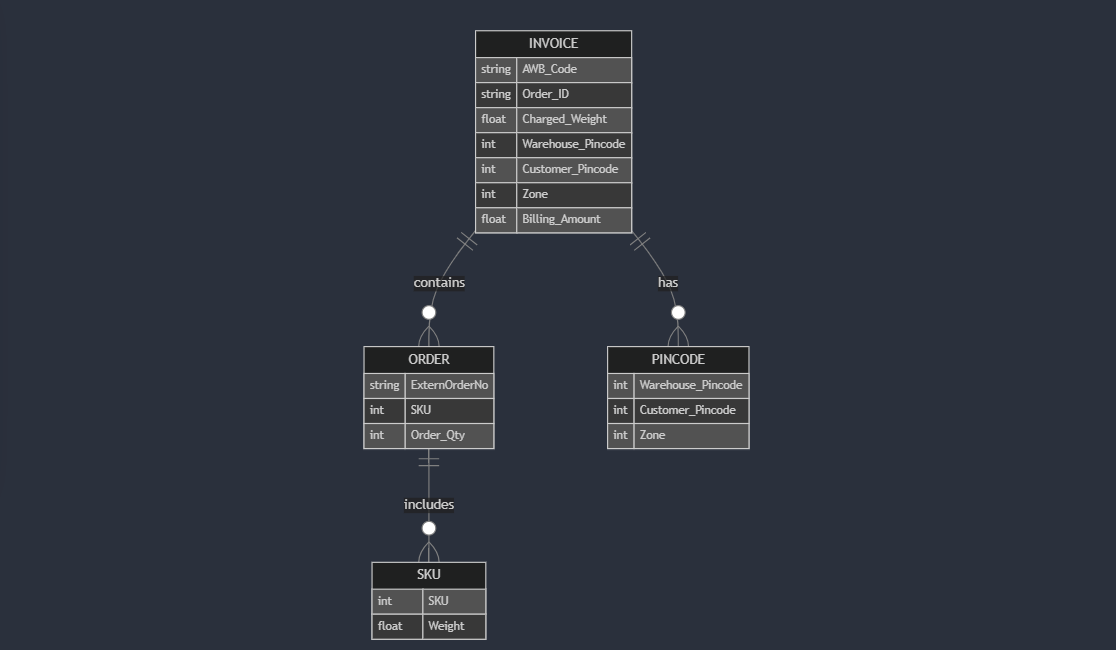

| **Entity** | **Relationship** | **Description** |
|------------|------------------|------------------|
| INVOICE    | contains         | An invoice can aggregate multiple orders, representing various shipments or items purchased together. |
| INVOICE    | has              | An invoice is linked to multiple pincodes, indicating the warehouse and customer delivery locations. |
| ORDER      | includes         | An order can consist of multiple SKUs, allowing customers to purchase different products in a single transaction. |


The Order table is the master table, as it contains the most records (400) and serves as the central dataset for transactional data, with other tables providing supplementary details.

-  Merge Order and SKU table ---> on 'SKU'
-  Merge Invoice and Pincode table ---> on 'Customer Pincode'
-  Then Merge the two Order_SKU and Invoice_Pincode tables to make the "Data".

In [77]:
order_sku = pd.merge(order,sku,on='SKU',how='outer')
order_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExternOrderNo  398 non-null    int64  
 1   SKU            398 non-null    object 
 2   Order Qty      398 non-null    float64
 3   Weight (g)     398 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [78]:
order_sku.duplicated().sum()

np.int64(0)

In [80]:
invoice_pincode = pd.merge(invoice,pincode, on='Customer Pincode', how='outer', suffixes=('_inv', '_pincode'))
invoice_pincode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AWB Code                   124 non-null    int64  
 1   Order ID                   124 non-null    int64  
 2   Charged Weight             124 non-null    float64
 3   Warehouse Pincode_inv      124 non-null    int64  
 4   Customer Pincode           124 non-null    int64  
 5   Zone_inv                   124 non-null    object 
 6   Type of Shipment           124 non-null    object 
 7   Billing Amount (Rs.)       124 non-null    float64
 8   Warehouse Pincode_pincode  124 non-null    int64  
 9   Zone_pincode               124 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 9.8+ KB


In [59]:
# Filter where 'Warehouse Pincode_inv' is not equal to 'Warehouse Pincode' and 'Zone_inv' is not equal to 'Zone_pincode'
filtered_invoice_pincode = invoice_pincode[(invoice_pincode['Warehouse Pincode_inv'] != invoice_pincode['Warehouse Pincode_pincode']) &
                                           (invoice_pincode['Zone_inv'] != invoice_pincode['Zone_pincode'])]

# Display the filtered data
filtered_invoice_pincode


,AWB Code,Order ID,Charged Weight,Warehouse Pincode_inv,Customer Pincode,Zone_inv,Type of Shipment,Billing Amount (Rs.),Warehouse Pincode_pincode,Zone_pincode


<h7 style="color:gold;font-style:italic; font-family:Georgia">Observation:</h7>


- All rows have matching `Warehouse Pincode` and `Zone` between the `invoice` and `pincode` tables, indicating no mismatches in the dataset.


In [60]:
# Hence, we can drop one of the `Warehouse Pincode` and one of the `Zone` columns since they are identical, 
# and rename the remaining columns for clarity.

# Drop duplicate columns 
invoice_pincode.drop(columns=['Warehouse Pincode_pincode', 'Zone_pincode'],inplace=True)

# Rename the remaining columns for clarity
invoice_pincode = invoice_pincode.rename(columns={
    'Warehouse Pincode_inv': 'Warehouse Pincode',
    'Zone_inv': 'Zone'
})

In [61]:
invoice_pincode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AWB Code              124 non-null    int64  
 1   Order ID              124 non-null    int64  
 2   Charged Weight        124 non-null    float64
 3   Warehouse Pincode     124 non-null    int64  
 4   Customer Pincode      124 non-null    int64  
 5   Zone                  124 non-null    object 
 6   Type of Shipment      124 non-null    object 
 7   Billing Amount (Rs.)  124 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.9+ KB


In [62]:
order_sku_invoice_pincode = pd.merge(order_sku,invoice_pincode,left_on='ExternOrderNo',right_on='Order ID',how='outer')
order_sku_invoice_pincode.drop(columns=['Order ID'], inplace=True)
order_sku_invoice_pincode.rename(columns={"ExternOrderNo": "Order ID"}, inplace=True)
order_sku_invoice_pincode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              398 non-null    int64  
 1   SKU                   398 non-null    object 
 2   Order Qty             398 non-null    float64
 3   Weight (g)            398 non-null    int64  
 4   AWB Code              398 non-null    int64  
 5   Charged Weight        398 non-null    float64
 6   Warehouse Pincode     398 non-null    int64  
 7   Customer Pincode      398 non-null    int64  
 8   Zone                  398 non-null    object 
 9   Type of Shipment      398 non-null    object 
 10  Billing Amount (Rs.)  398 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 34.3+ KB


In [63]:
# Checking for the Null values in joinned table
order_sku_invoice_pincode.isnull().sum()

Order ID                0
SKU                     0
Order Qty               0
Weight (g)              0
AWB Code                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

In [64]:
# Checking for the duplicated values if present in the joined table.
order_sku_invoice_pincode.duplicated().sum()

np.int64(0)

In [81]:
# Lets save this merged data into "data" variable:
data = order_sku_invoice_pincode.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              398 non-null    int64  
 1   SKU                   398 non-null    object 
 2   Order Qty             398 non-null    float64
 3   Weight (g)            398 non-null    int64  
 4   AWB Code              398 non-null    int64  
 5   Charged Weight        398 non-null    float64
 6   Warehouse Pincode     398 non-null    int64  
 7   Customer Pincode      398 non-null    int64  
 8   Zone                  398 non-null    object 
 9   Type of Shipment      398 non-null    object 
 10  Billing Amount (Rs.)  398 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 34.3+ KB


In [84]:
# Not correct do it again analyzie it....

# Convert to integers first to remove decimals, then convert to strings (object type)
data['Order ID'] = data['Order ID'].round(0).astype('int64').astype('object')
data['AWB Code'] = data['AWB Code'].round(0).astype('int64').astype('object')

# Convert 'Order Qty' to int64 (will fail if there are NaN values)
data['Order Qty'] = data['Order Qty'].astype('int64')

# Ensure 'Charged Weight', 'Billing Amount (Rs.)', and 'Weight (g)' are float64
data['Charged Weight'] = data['Charged Weight'].astype('float64')
data['Billing Amount (Rs.)'] = data['Billing Amount (Rs.)'].astype('float64')
data['Weight (g)'] = data['Weight (g)'].astype('float64')

# Convert 'Warehouse Pincode' and 'Customer Pincode' to object (string) type
data['Warehouse Pincode'] = data['Warehouse Pincode'].astype('object')
data['Customer Pincode'] = data['Customer Pincode'].astype('object')


In [58]:
data.head()

,Order ID,SKU,Order Qty,AWB Code,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Weight (g)
0,2001808801.0,8904223815682,1.0,1091117437680.0,0.80,121003,335001,d,Forward charges,90.2,210.0
1,2001806567.0,8904223815804,1.0,1091117224902.0,1.16,121003,370201,d,Forward charges,135.0,160.0
2,2001808118.0,8904223815859,1.0,1091117435134.0,0.50,121003,140301,b,Forward charges,33.0,165.0
3,2001808118.0,8904223815859,1.0,1091117435134.0,0.50,121003,140301,b,Forward charges,33.0,165.0
4,2001808675.0,8904223815859,1.0,1091117437050.0,1.20,121003,226010,b,Forward charges,89.6,165.0
